<a href="https://colab.research.google.com/github/VlatekSoft/AI_experiments/blob/main/%D0%92%D0%B5%D0%B1%D0%B8%D0%BD%D0%B0%D1%80_17_%D0%B4%D0%B5%D0%BA%D0%B0%D0%B1%D1%80%D1%8F_2024_%D0%9C%D0%B0%D1%80%D0%B0%D1%84%D0%BE%D0%BD_web_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%94%D0%B5%D0%BD%D1%8C_1_Web_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Django

**Django** — это высокоуровневый веб-фреймворк на языке программирования Python, который позволяет быстро и эффективно разрабатывать веб-приложения.

In [ ]:
# @title Установка библиотеки Django
# Установим Django
!pip install django
# Создадим Django-проект
!django-admin startproject myproject
!pip install django-cors-headers
# Перейдём в папку проекта
%cd /content/myproject

# Создадим Django-приложение
!python manage.py startapp textprocessor


import os

# Путь к файлу, который нужно обработать
file_path = "/content/myproject/myproject/settings.py"

# Читаем содержимое файла и извлекаем SECRET_KEY
with open(file_path, "r") as file:
    content = file.read()

# Извлекаем значение SECRET_KEY
import re
secret_key_match = re.search(r'SECRET_KEY\s*=\s*[\'"](.+?)[\'"]', content)
if secret_key_match:
    secret_key = secret_key_match.group(1)
else:
    raise ValueError("SECRET_KEY не найден в файле.")

# Новое содержимое файла

text_s = f"""

SECRET_KEY = '{secret_key}'

from pathlib import Path
import os
# Build paths inside the project like this: BASE_DIR / 'subdir'.
BASE_DIR = Path(__file__).resolve().parent.parent

# Quick-start development settings - unsuitable for production
# See https://docs.djangoproject.com/en/5.1/howto/deployment/checklist/


# SECURITY WARNING: don't run with debug turned on in production!
DEBUG = True

ALLOWED_HOSTS = ['*']  # Разрешить запросы с любых хостов

# CORS settings
INSTALLED_APPS = [
    'corsheaders',  # Добавить приложение для обработки CORS
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'textprocessor',  # Ваше приложение для обработки текстов
]

MIDDLEWARE = [
    'corsheaders.middleware.CorsMiddleware',  # CORS обработчик (должен быть первым)
    'django.middleware.common.CommonMiddleware',
    'django.middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',
]

CORS_ALLOW_ALL_ORIGINS = True  # Разрешить запросы с любых доменов
CORS_ALLOW_METHODS = [  # Разрешить только определенные методы
    'GET',
    'POST',
    'OPTIONS',
]
CORS_ALLOW_HEADERS = [  # Разрешенные заголовки
    'content-type',
    'authorization',
]

ROOT_URLCONF = 'myproject.urls'

TEMPLATES = [
    {{
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [],
        'APP_DIRS': True,
        'OPTIONS': {{
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        }},
    }},
]

WSGI_APPLICATION = 'myproject.wsgi.application'

# Database
# https://docs.djangoproject.com/en/5.1/ref/settings/#databases

DATABASES = {{
    'default': {{
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }}
}}

# Password validation
# https://docs.djangoproject.com/en/5.1/ref/settings/#auth-password-validators

AUTH_PASSWORD_VALIDATORS = [
    {{
        'NAME': 'django.contrib.auth.password_validation.UserAttributeSimilarityValidator',
    }},
    {{
        'NAME': 'django.contrib.auth.password_validation.MinimumLengthValidator',
    }},
    {{
        'NAME': 'django.contrib.auth.password_validation.CommonPasswordValidator',
    }},
    {{
        'NAME': 'django.contrib.auth.password_validation.NumericPasswordValidator',
    }},
]

# Internationalization
# https://docs.djangoproject.com/en/5.1/topics/i18n/

LANGUAGE_CODE = 'en-us'

TIME_ZONE = 'UTC'

USE_I18N = True

USE_TZ = True

# Static files (CSS, JavaScript, Images)
# https://docs.djangoproject.com/en/5.1/howto/static-files/

STATIC_URL = 'static/'

# Default primary key field type
# https://docs.djangoproject.com/en/5.1/ref/settings/#default-auto-field

DEFAULT_AUTO_FIELD = 'django.db.models.BigAutoField'

"""


# Перезаписываем файл с новым содержимым
with open(file_path, "w") as file:
    file.write(text_s)



def read_and_print_file():
    """
    Открывает файл user_logs.txt, читает его содержимое и печатает его.
    """
    try:
        # Открытие и чтение содержимого файла user_logs.txt
        with open('/content/myproject/user_logs.txt', 'r') as file:
            content = file.read()

        # Печать содержимого файла
        print(content)
        #return content  # Возвращаем содержимое файла, если необходимо использовать его дальше
    except FileNotFoundError:
        print("Файл user_logs.txt не найден.")
        #return None
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        #return None


def run_react():
    !nohup npm start > react_output.log 2>&1 &


def run_django():
    %cd /content/myproject
    !nohup python manage.py migrate > migrate.log 2>&1
    !nohup python manage.py runserver 0.0.0.0:8000 > django.log 2>&1 &

CommandError: '/content/myproject' already exists
/content/myproject
CommandError: 'textprocessor' conflicts with the name of an existing Python module and cannot be used as an app name. Please try another name.


>Django будет выступать в роли сервера, на котором будет запускаться функция с запросом к GPT

In [ ]:
# @title Установка библиотеки OpenAI и ключа из секретов Colab
!pip install openai==0.28.1
# Токен из секретов Colab
from google.colab import userdata
d_key = userdata.get("OPENAI_API_KEY")

Пример запроса от React по API к Django:
```
{
    "method": "POST",
    "headers": {
        "Content-Length": "124",
        "Content-Type": "application/json",
        "Host": "9675-35-184-162-73.ngrok-free.app",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36",
        "Accept": "application/json, text/plain, */*",
        "Accept-Encoding": "gzip, deflate, br, zstd",
        "Accept-Language": "ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7",
        "Origin": "https://a53f-35-184-162-73.ngrok-free.app",
        "Priority": "u=1, i",
        "Referer": "https://a53f-35-184-162-73.ngrok-free.app/",
        "Sec-Ch-Ua": "\"Google Chrome\";v=\"131\", \"Chromium\";v=\"131\", \"Not_A Brand\";v=\"24\"",
        "Sec-Ch-Ua-Mobile": "?0",
        "Sec-Ch-Ua-Platform": "\"Windows\"",
        "Sec-Fetch-Dest": "empty",
        "Sec-Fetch-Mode": "cors",
        "Sec-Fetch-Site": "cross-site",
        "X-Forwarded-For": "37.131.192.105",
        "X-Forwarded-Host": "9675-35-184-162-73.ngrok-free.app",
        "X-Forwarded-Proto": "https"
    },
    "body": "{\"text\":\"Расскажи про использование ИИ в машиностроении\",\"slider\":1,\"slider2\":1000}",
    "GET_params": {},
    "POST_params": {},
    "path": "/api/process/",
    "user": "AnonymousUser"
}
```



### Функция для отправки запроса GPT

>**Не запускать!**

In [ ]:
import os # Импортируем модуль os для работы с файловой системой и переменными окружения
from django.http import JsonResponse # Импортируем JsonResponse из Django для удобного создания HTTP-ответов в формате JSON
from django.views.decorators.csrf import csrf_exempt # Импортируем декоратор csrf_exempt для отключения проверки CSRF в обработчике запросов
import json # Импортируем модуль json для работы с JSON-данными (сериализация и десериализация)
import openai # Импортируем модуль openai для взаимодействия с OpenAI API
import datetime # Импортируем модуль datetime для работы с датами и временем

# Получение API-ключа из секретов (переменной окружения)
openai.api_key = d_key


# Функция для отправки запроса GPT
@csrf_exempt # Отключение проверки CSRF для данной функции (подходит для API, но следует использовать с осторожностью)
def process_text(request):

    data = json.loads(request.body) # Парсим JSON-данные из тела запроса
    text = data.get('text', '') # Извлекаем текст, отправленный пользователем
    temperature = data.get('slider', 0.5)  # Извлекаем первого слайдера (по умолчанию 0.5)
    max_tokens = data.get('slider2', 1000)  # Значение второго слайдера (по умолчанию 1000)

    # Проверка диапазона для temperature
    if not (0 <= temperature <= 1):
        return JsonResponse({'error': 'Temperature must be between 0 and 1'}, status=400)

    # Проверка диапазона для max_tokens
    if not (500 <= max_tokens <= 2000):
        return JsonResponse({'error': 'Max tokens must be between 500 and 2000'}, status=400)


    user = "Ты эксперт во всех областях."
    prompt = f"Отвечай дружелюбно. Вопрос: {text}"

    # Отправка текста в GPT
    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",
        messages=[
                {"role": "system", "content": user},
                {"role": "user", "content": prompt}
                  ],
        max_tokens=max_tokens, # Используем значение второго слайдера
        temperature=temperature  # Используем значение первого слайдера
        )

    # Извлекаем ответ бота
    bot_reply = response['choices'][0]['message']['content']

    # Возвращаем ответ пользователю в формате JSON
    return JsonResponse({'bot_reply': bot_reply})

In [ ]:
# @title Записываем функцию для запроса GPT в файл
text_ob_django = f"""
import os
from django.http import JsonResponse
from django.views.decorators.csrf import csrf_exempt
import json
import openai
import datetime


# Получение API-ключа из секретов (переменной окружения)
openai.api_key = '{d_key}'


@csrf_exempt
def process_text(request):
    if request.method == 'POST':

        try:
            data = json.loads(request.body)
            text = data.get('text', '')
            temperature = data.get('slider', 0.5)  # Извлекаем значение бегунка (по умолчанию 0.5)
            max_tokens = data.get('slider2', 1000)  # Значение второго слайдера

            # Проверка диапазона для temperature
            if not (0 <= temperature <= 1):
                return JsonResponse({{'error': 'Temperature must be between 0 and 1'}}, status=400)

            # Проверка диапазона для max_tokens
            if not (500 <= max_tokens <= 2000):
                return JsonResponse({{'error': 'Max tokens must be between 500 and 2000'}}, status=400)



            user = "Ты эксперт во всех облаястях."
            prompt = f"Отвечай дружелюбно. Вопрос: {{text}}"


            # Отправка текста в GPT
            response = openai.ChatCompletion.create(
                model="gpt-4o-mini",
                messages=[
                            {{"role": "system", "content": user}},
                            {{"role": "user", "content": prompt}}
                        ],
                max_tokens=max_tokens, # Используем значение второго слайдера
                temperature=temperature  # Используем значение первого слайдера
            )
            # Извлекаем ответ бота
            bot_reply = response['choices'][0]['message']['content']


            return JsonResponse({{'bot_reply': bot_reply}})
        except Exception as e:
            return JsonResponse({{'error': str(e)}}, status=500)

    return JsonResponse({{'error': 'Invalid request'}}, status=400)

@csrf_exempt
def log_action(request):
    if request.method == "POST":
        data = json.loads(request.body)
        message = data.get("message", "No message provided")
        with open("user_logs.txt", "a") as log_file:
            current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            log_file.write(f"{{current_time}} | {{message}}\\n")
        return JsonResponse({{"status": "success", "message": "Log saved"}})
    return JsonResponse({{"status": "error", "message": "Invalid request method"}}, status=400)

"""

import os
# Создадим API для обработки текста
with open('textprocessor/views.py', 'w') as file:
    file.write(text_ob_django)


# Добавим URL для API logger.info(f"Response data: {{'bot_reply': {bot_reply}}}")
os.makedirs('textprocessor/urls', exist_ok=True)
with open('textprocessor/urls.py', 'w') as f:
    f.write("""
from django.urls import path
from .views import process_text, log_action

urlpatterns = [
    path('process/', process_text),
    path('log_action/', log_action),
]
""")

# Пропишем маршруты
with open('myproject/urls.py', 'a') as f:
    f.write("\nfrom django.urls import include\nurlpatterns += [path('api/', include('textprocessor.urls'))]\n")



## Ngrok

**Ngrok** — это инструмент, который позволяет создать безопасный туннель из локального компьютера в интернет. Он используется для того, чтобы сделать локальный сервер или приложение доступным из интернета через публичный URL.

In [ ]:
# @title Установка Ngrok
!pip install pyngrok
from pyngrok import ngrok
#Авторизация
ngrok_key = userdata.get("NGROK_KEY")
ngrok.set_auth_token(ngrok_key)

## React

**React** — это популярная библиотека JavaScript, предназначенная для создания пользовательских интерфейсов (UI). React позволяет разработчикам эффективно и гибко строить компоненты интерфейса, которые обновляются при изменении данных, обеспечивая плавный и динамичный пользовательский опыт.

In [ ]:
# @title Установка React
# Установка Node.js и npm одной командой
!curl -fsSL https://deb.nodesource.com/setup_18.x | bash -
!apt-get install -y nodejs
#Создать React-приложение
!npx --yes create-react-app react-app #сразу деламе подтверждение
%cd react-app
# Установим axios для отправки запросов
!npm install axios

2024-12-17 16:47:51 - Installing pre-requisites
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://deb.nodesource.com/node_18.x nodistro InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 2s (70.8 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/

**Обработчик React**
> Это файл, в котором прописана логика взаимодействия элементов страницы (кнопки, поля ввода, слайдеры и тд.) между собой и с внешними сервисами, типа Django. А так же прописан дизайн всех элементов.

https://codesandbox.io/p/sandbox/gnqp96

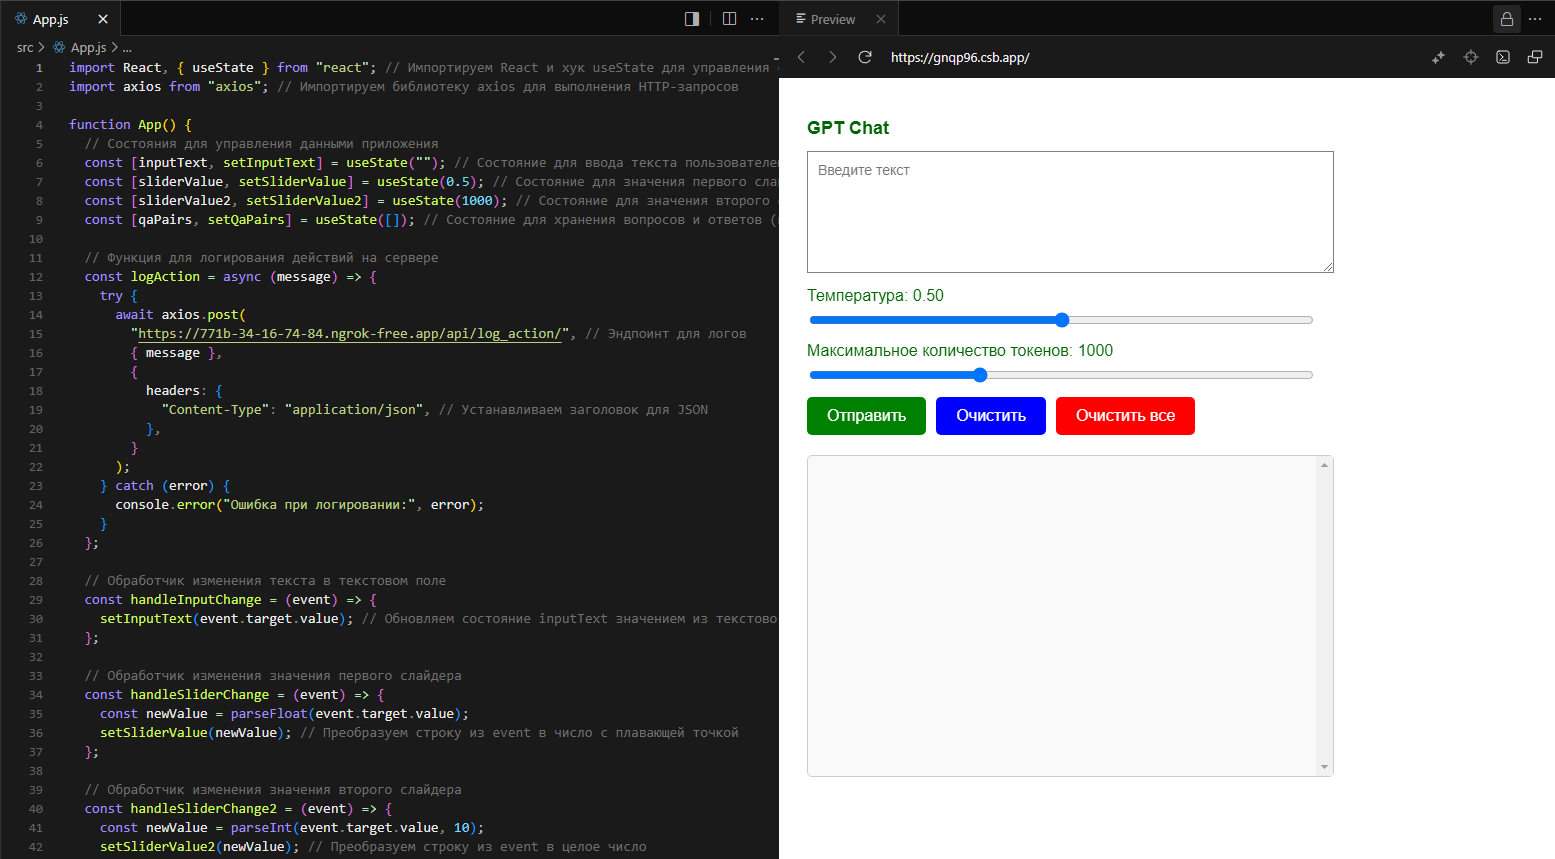

In [ ]:
# @title Создание файла обработчика React
%cd /content/myproject/react-app

link_r = ""

text_ob_react =  f"""

import React, {{ useState }} from "react"; // Импортируем React и хук useState для управления состоянием
import axios from "axios"; // Импортируем библиотеку axios для выполнения HTTP-запросов

function App() {{
  // Состояния для управления данными приложения
  const [inputText, setInputText] = useState(""); // Состояние для ввода текста пользователем
  const [sliderValue, setSliderValue] = useState(0.5); // Состояние для значения первого слайдера
  const [sliderValue2, setSliderValue2] = useState(1000); // Состояние для значения второго слайдера
  const [qaPairs, setQaPairs] = useState([]); // Состояние для хранения вопросов и ответов (история диалога)


  // Функция для логирования действий на сервере
  const logAction = async (message) => {{
    try {{
      await axios.post(
        "{link_r}/api/log_action/", // Эндпоинт для логов
        {{ message }},
        {{
          headers: {{
            "Content-Type": "application/json", // Устанавливаем заголовок для JSON
          }},
        }}
      );
    }} catch (error) {{
      console.error("Ошибка при логировании:", error);
    }}
  }};

  // Обработчик изменения текста в текстовом поле
  const handleInputChange = (event) => {{
    setInputText(event.target.value); // Обновляем состояние inputText значением из текстового поля
   }};

  // Обработчик изменения значения первого слайдера
  const handleSliderChange = (event) => {{
    const newValue = parseFloat(event.target.value);
    setSliderValue(newValue); // Преобразуем строку из event в число с плавающей точкой
  }};

  // Обработчик изменения значения второго слайдера
  const handleSliderChange2 = (event) => {{
    const newValue = parseInt(event.target.value, 10);
    setSliderValue2(newValue); // Преобразуем строку из event в целое число
  }};

  // Обработчик отправки данных на сервер
  const handleSend = async () => {{
    if (inputText.trim() === "") {{
      // Проверяем, введён ли текст
      alert("Пожалуйста, введите текст");
      return;
    }}

    logAction(`Пользователь нажал кнопку: Отправить. Температура: ${{sliderValue}} Токены: ${{sliderValue2}} Вопрос: ${{inputText}}`); // Логируем событие отправки


    try {{
      // Выполняем POST-запрос на сервер
      const response = await axios.post(
        "{link_r}/api/process/", // Адрес API
        {{
          text: inputText, // Отправляем текст, введённый пользователем
          slider: sliderValue, // Отправляем значение первого слайдера
          slider2: sliderValue2, // Отправляем значение второго слайдера
        }},
       {{
          headers: {{
            "Content-Type": "application/json", // Устанавливаем заголовок для JSON
          }},
        }}
      );



      // Формируем новую пару вопрос-ответ на основе ответа сервера
      const newPair = {{ question: inputText, answer: response.data.bot_reply }};
      setQaPairs((prevPairs) => [...prevPairs, newPair]); // Добавляем новую пару в историю
      setInputText(""); // Очищаем поле ввода текста после отправки

      logAction(
        `Получен ответ: ${{response.data.bot_reply}}`
      ); // Логируем факт получения ответа
    }} catch (error) {{
      // Обрабатываем ошибки
      console.error("Ошибка при отправке данных:", error);
      const newPair = {{
        question: inputText,
        answer: "Произошла ошибка. Попробуйте снова.", // Сообщение об ошибке в случае сбоя
      }};
      setQaPairs((prevPairs) => [...prevPairs, newPair]); // Добавляем сообщение об ошибке в историю
      logAction("Ошибка при отправке данных на сервер"); // Логируем ошибку
    }}
  }};

  // Обработчик для очистки текста и слайдеров
  const handleClear = () => {{
    setInputText(""); // Сбрасываем текстовое поле
    setSliderValue(0.5); // Сбрасываем значение первого слайдера
    setSliderValue2(1000); // Сбрасываем значение второго слайдера
    logAction("Пользователь нажал кнопку: Очистить"); // Логируем событие
  }};

  // Обработчик для очистки всей истории вопросов и ответов
  const handleClearAll = () => {{
    setQaPairs([]); // Очищаем массив истории
    logAction("Пользователь нажал кнопку: Очистить всё"); // Логируем событие
  }};

  // Основной рендеринг приложения
  return (
    <div style={{{{ fontFamily: "Arial, sans-serif", padding: "20px" }}}}>
      {{/* Заголовок приложения */}}
      <h1 style={{{{ fontSize: "18px", color: "darkgreen" }}}}>GPT Chat</h1>

      {{/* Текстовое поле для ввода */}}
      <textarea
        value={{inputText}}
        onChange={{handleInputChange}}
        placeholder="Введите текст"
        style={{{{
          width: "70%",
          height: "100px",
          backgroundColor: "white",
          border: "1px solid gray",
          fontFamily: "Arial",
          fontSize: "14px",
          color: "black",
          marginBottom: "10px",
          padding: "10px",
        }}}}
      />

      {{/* Первый слайдер */}}
      <div style={{{{ marginBottom: "10px" }}}}>
        <label
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "darkgreen",
            display: "block",
            marginBottom: "5px",
          }}}}
        >
          Температура: {{sliderValue.toFixed(2)}} {{/* Отображаем значение первого слайдера */}}
        </label>
        <input
          type="range"
          min="0"
          max="1"
          step="0.01"
          value={{sliderValue}}
          onChange={{handleSliderChange}}
          style={{{{ width: "70%" }}}}
        />
      </div>

      {{/* Второй слайдер */}}
      <div style={{{{ marginBottom: "10px" }}}}>
        <label
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "darkgreen",
            display: "block",
            marginBottom: "5px",
          }}}}
        >
          Максимальное количество токенов: {{sliderValue2}} {{/* Отображаем значение второго слайдера */}}
        </label>
        <input
          type="range"
          min="500"
          max="2000"
          step="100"
          value={{sliderValue2}}
          onChange={{handleSliderChange2}}
          style={{{{ width: "70%" }}}}
        />
      </div>

      {{/* Кнопки управления */}}
      <div style={{{{ marginBottom: "20px" }}}}>
        <button
          onClick={{handleSend}} // Кнопка для отправки данных
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "white",
            backgroundColor: "green",
            border: "none",
            padding: "10px 20px",
            marginRight: "10px",
            cursor: "pointer",
            borderRadius: "5px",
          }}}}
        >
          Отправить
        </button>


        <button
          onClick={{handleClear}}
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "white",
            backgroundColor: "blue",
            border: "none",
            padding: "10px 20px",
            marginRight: "10px",
            cursor: "pointer",
            borderRadius: "5px",
          }}}}
        >
          Очистить
        </button>
        <button
          onClick={{handleClearAll}}
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "white",
            backgroundColor: "red",
            border: "none",
            padding: "10px 20px",
            cursor: "pointer",
            borderRadius: "5px",
          }}}}
        >
          Очистить все
        </button>
      </div>

      <div
        style={{{{
          height: "300px",
          overflowY: "scroll",
          border: "1px solid #ccc",
          padding: "10px",
          borderRadius: "5px",
          backgroundColor: "#f9f9f9",
          width: "70%",
        }}}}
      >
        {{qaPairs.map((pair, index) => (
          <div key={{index}} style={{{{ marginBottom: "10px" }}}}>
            <p style={{{{ color: "darkgreen", margin: "0" }}}}>
              <strong>Вопрос:</strong> {{pair.question}}
            </p>
            <p style={{{{ color: "darkblue", margin: "0" }}}}>
              <strong>Ответ:</strong> {{pair.answer}}
            </p>
          </div>
        ))}}
      </div>
    </div>
  );
}}

export default App;
"""

# Создадим API для обработки текста
with open('src/App.js', 'w') as file:
    file.write(text_ob_react)


/content/myproject/react-app


Запуск React в фоновом режиме

In [ ]:
run_react()

Cсылка (тунель) для 3000 порта для React

In [ ]:
public_url2 = ngrok.connect(3000)
print(f"React-приложение доступно по адресу: {public_url2}")

React-приложение доступно по адресу: NgrokTunnel: "https://3531-35-234-38-243.ngrok-free.app" -> "http://localhost:3000"


> В предыдущей ячейке мы получили ссылку на сайт, который создан с помощью React. Если перейти по ссылке, то видно, что элементы дизайна есть, но ответа от GPT мы не получаем. Необходимо запуситить приложение Django, при обращении к которому React будет получать ответы и отображать их на сайте.

## Запуск Django

In [ ]:
# Запуск в фоновом режиме
run_django()

/content/myproject


Ссылка (тунель) для 8000 порта для Django
> Ссылка понадобится для обработчика React

In [ ]:
public_url = ngrok.connect(8000)
print(f"django-приложение доступно по адресу: {public_url}")

django-приложение доступно по адресу: NgrokTunnel: "https://408c-35-234-38-243.ngrok-free.app" -> "http://localhost:8000"


In [ ]:
# @title Перезапись обработчика React - добавление ссылки на сервис Django
public_url_str = str(public_url)

# Извлечение URL с использованием регулярного выражения
match = re.search(r'https://[^\s"]+', public_url_str)
if match:
    link_r = match.group(0)
    #print(f"django-приложение доступно по адресу: ")
    #print(link_r)
else:
    print("URL не найден.")

%cd /content/myproject/react-app

text_ob_react =  f"""

import React, {{ useState }} from "react"; // Импортируем React и хук useState для управления состоянием
import axios from "axios"; // Импортируем библиотеку axios для выполнения HTTP-запросов

function App() {{
  // Состояния для управления данными приложения
  const [inputText, setInputText] = useState(""); // Состояние для ввода текста пользователем
  const [sliderValue, setSliderValue] = useState(0.5); // Состояние для значения первого слайдера
  const [sliderValue2, setSliderValue2] = useState(1000); // Состояние для значения второго слайдера
  const [qaPairs, setQaPairs] = useState([]); // Состояние для хранения вопросов и ответов (история диалога)


  // Функция для логирования действий на сервере
  const logAction = async (message) => {{
    try {{
      await axios.post(
        "{link_r}/api/log_action/", // Эндпоинт для логов
        {{ message }},
        {{
          headers: {{
            "Content-Type": "application/json", // Устанавливаем заголовок для JSON
          }},
        }}
      );
    }} catch (error) {{
      console.error("Ошибка при логировании:", error);
    }}
  }};

  // Обработчик изменения текста в текстовом поле
  const handleInputChange = (event) => {{
    setInputText(event.target.value); // Обновляем состояние inputText значением из текстового поля
   }};

  // Обработчик изменения значения первого слайдера
  const handleSliderChange = (event) => {{
    const newValue = parseFloat(event.target.value);
    setSliderValue(newValue); // Преобразуем строку из event в число с плавающей точкой
  }};

  // Обработчик изменения значения второго слайдера
  const handleSliderChange2 = (event) => {{
    const newValue = parseInt(event.target.value, 10);
    setSliderValue2(newValue); // Преобразуем строку из event в целое число
  }};

  // Обработчик отправки данных на сервер
  const handleSend = async () => {{
    if (inputText.trim() === "") {{
      // Проверяем, введён ли текст
      alert("Пожалуйста, введите текст");
      return;
    }}

    logAction(`Пользователь нажал кнопку: Отправить. Температура: ${{sliderValue}} Токены: ${{sliderValue2}} Вопрос: ${{inputText}}`); // Логируем событие отправки


    try {{
      // Выполняем POST-запрос на сервер
      const response = await axios.post(
        "{link_r}/api/process/", // Адрес API
        {{
          text: inputText, // Отправляем текст, введённый пользователем
          slider: sliderValue, // Отправляем значение первого слайдера
          slider2: sliderValue2, // Отправляем значение второго слайдера
        }},
       {{
          headers: {{
            "Content-Type": "application/json", // Устанавливаем заголовок для JSON
          }},
        }}
      );



      // Формируем новую пару вопрос-ответ на основе ответа сервера
      const newPair = {{ question: inputText, answer: response.data.bot_reply }};
      setQaPairs((prevPairs) => [...prevPairs, newPair]); // Добавляем новую пару в историю
      setInputText(""); // Очищаем поле ввода текста после отправки

      logAction(
        `Получен ответ: ${{response.data.bot_reply}}`
      ); // Логируем факт получения ответа
    }} catch (error) {{
      // Обрабатываем ошибки
      console.error("Ошибка при отправке данных:", error);
      const newPair = {{
        question: inputText,
        answer: "Произошла ошибка. Попробуйте снова.", // Сообщение об ошибке в случае сбоя
      }};
      setQaPairs((prevPairs) => [...prevPairs, newPair]); // Добавляем сообщение об ошибке в историю
      logAction("Ошибка при отправке данных на сервер"); // Логируем ошибку
    }}
  }};

  // Обработчик для очистки текста и слайдеров
  const handleClear = () => {{
    setInputText(""); // Сбрасываем текстовое поле
    setSliderValue(0.5); // Сбрасываем значение первого слайдера
    setSliderValue2(1000); // Сбрасываем значение второго слайдера
    logAction("Пользователь нажал кнопку: Очистить"); // Логируем событие
  }};

  // Обработчик для очистки всей истории вопросов и ответов
  const handleClearAll = () => {{
    setQaPairs([]); // Очищаем массив истории
    logAction("Пользователь нажал кнопку: Очистить всё"); // Логируем событие
  }};

  // Основной рендеринг приложения
  return (
    <div style={{{{ fontFamily: "Arial, sans-serif", padding: "20px" }}}}>
      {{/* Заголовок приложения */}}
      <h1 style={{{{ fontSize: "18px", color: "darkgreen" }}}}>GPT Chat</h1>

      {{/* Текстовое поле для ввода */}}
      <textarea
        value={{inputText}}
        onChange={{handleInputChange}}
        placeholder="Введите текст"
        style={{{{
          width: "70%",
          height: "100px",
          backgroundColor: "white",
          border: "1px solid gray",
          fontFamily: "Arial",
          fontSize: "14px",
          color: "black",
          marginBottom: "10px",
          padding: "10px",
        }}}}
      />

      {{/* Первый слайдер */}}
      <div style={{{{ marginBottom: "10px" }}}}>
        <label
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "darkgreen",
            display: "block",
            marginBottom: "5px",
          }}}}
        >
          Температура: {{sliderValue.toFixed(2)}} {{/* Отображаем значение первого слайдера */}}
        </label>
        <input
          type="range"
          min="0"
          max="1"
          step="0.01"
          value={{sliderValue}}
          onChange={{handleSliderChange}}
          style={{{{ width: "70%" }}}}
        />
      </div>

      {{/* Второй слайдер */}}
      <div style={{{{ marginBottom: "10px" }}}}>
        <label
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "darkgreen",
            display: "block",
            marginBottom: "5px",
          }}}}
        >
          Максимальное количество токенов: {{sliderValue2}} {{/* Отображаем значение второго слайдера */}}
        </label>
        <input
          type="range"
          min="500"
          max="2000"
          step="100"
          value={{sliderValue2}}
          onChange={{handleSliderChange2}}
          style={{{{ width: "70%" }}}}
        />
      </div>

      {{/* Кнопки управления */}}
      <div style={{{{ marginBottom: "20px" }}}}>
        <button
          onClick={{handleSend}} // Кнопка для отправки данных
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "white",
            backgroundColor: "green",
            border: "none",
            padding: "10px 20px",
            marginRight: "10px",
            cursor: "pointer",
            borderRadius: "5px",
          }}}}
        >
          Отправить
        </button>


        <button
          onClick={{handleClear}}
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "white",
            backgroundColor: "blue",
            border: "none",
            padding: "10px 20px",
            marginRight: "10px",
            cursor: "pointer",
            borderRadius: "5px",
          }}}}
        >
          Очистить
        </button>
        <button
          onClick={{handleClearAll}}
          style={{{{
            fontFamily: "Arial",
            fontSize: "16px",
            color: "white",
            backgroundColor: "red",
            border: "none",
            padding: "10px 20px",
            cursor: "pointer",
            borderRadius: "5px",
          }}}}
        >
          Очистить все
        </button>
      </div>

      <div
        style={{{{
          height: "300px",
          overflowY: "scroll",
          border: "1px solid #ccc",
          padding: "10px",
          borderRadius: "5px",
          backgroundColor: "#f9f9f9",
          width: "70%",
        }}}}
      >
        {{qaPairs.map((pair, index) => (
          <div key={{index}} style={{{{ marginBottom: "10px" }}}}>
            <p style={{{{ color: "darkgreen", margin: "0" }}}}>
              <strong>Вопрос:</strong> {{pair.question}}
            </p>
            <p style={{{{ color: "darkblue", margin: "0" }}}}>
              <strong>Ответ:</strong> {{pair.answer}}
            </p>
          </div>
        ))}}
      </div>
    </div>
  );
}}

export default App;




"""

# Создадим API для обработки текста
with open('src/App.js', 'w') as file:
    file.write(text_ob_react)

/content/myproject/react-app


> После запуска сайта можно посмотреть логи




### **Логи**

In [ ]:
read_and_print_file()

2024-12-17 16:49:08 | Пользователь нажал кнопку: Отправить. Температура: 0.5 Токены: 1000 Вопрос: Расскажи про Ивана Грозного
2024-12-17 16:49:15 | Получен ответ: Иван Грозный — одна из самых ярких и противоречивых фигур в русской истории. Он родился 25 августа 1530 года и стал первым царем всея Руси в 1547 году. Его правление длилось более 50 лет, и оно оставило глубокий след в истории страны.

Иван IV, как его также называют, был очень образованным и талантливым человеком. Он проводил реформы, направленные на централизацию власти и укрепление государства. В частности, он создал новое административное деление страны и ввел систему выборных представителей — земских соборов.

Однако его правление также запомнилось жестокими репрессиями. Иван Грозный часто использовал террор против своих врагов и даже против своих приближенных, что привело к множеству казней и страданий. Его личная жизнь была не менее бурной: он пережил несколько жен и даже потерял любимую супругу Анастасию, что, по мнен

In [ ]:
read_and_print_file()

2024-12-17 12:48:30 | Пользователь нажал кнопку: Отправить. Температура: 0.5 Токены: 1000 Вопрос: Расскажи про Ивана Грозного
2024-12-17 12:48:38 | Получен ответ: Иван Грозный — одна из самых ярких и противоречивых фигур в истории России. Он родился 25 августа 1530 года и стал первым царем всея Руси. Его правление началось в 1547 году, когда он был коронован, и длилось до его смерти в 1584 году.

Иван IV известен своими реформами, которые затронули различные сферы жизни страны. Он провел административные реформы, создал новое законодательство и укрепил центральную власть. Также он основал Земский собор, который стал первым представительным органом в России.

Однако его правление также известно и жестокостью. Иван Грозный провел ряд репрессий против своей знати и даже создал опричнину — специальный институт, который занимался борьбой с предполагаемыми врагами царя. Это привело к множеству насильственных действий и страданиям для многих людей.

Несмотря на свою жестокость, Иван Грозный о

In [ ]:
read_and_print_file()


2024-12-16 12:31:30 | Пользователь нажал кнопку: Отправить. Температура: 0.3 Токены: 1500 Вопрос: Сколько звезд на небе?
2024-12-16 12:31:34 | Получен ответ: Привет! Это очень интересный вопрос. На самом деле, точное количество звезд на небе невозможно определить, но астрономы оценивают, что в нашей галактике Млечный Путь может быть от 100 до 400 миллиардов звезд. А если учитывать все галактики во Вселенной, то общее число звезд может достигать триллионов! Так что, можно сказать, что звезд на небе очень-очень много! ✨ Если у тебя есть еще вопросы, не стесняйся спрашивать!
2024-12-16 12:32:53 | Пользователь нажал кнопку: Отправить. Температура: 0.8 Токены: 1000 Вопрос: Расскажи кратко про использование ИИ в геологии
2024-12-16 12:32:57 | Получен ответ: Конечно! Искусственный интеллект (ИИ) в геологии находит широкое применение и значительно упрощает многие процессы. Вот несколько основных направлений:

1. **Геологическая интерпретация**: ИИ помогает анализировать данные из различных ис